# Marketing campaign success estimation model

# Pre-processing Steps 🔄
Before training the Random Forest model, I applied a set of preprocessing steps to get the data into shape.

✅ All the steps were designed to be fully compatible with how Random Forest works — no assumptions about linearity, but still clean and meaningful data.

This included cleaning, feature engineering, handling missing values, dropping noisy columns, and encoding categoricals. Basically, making sure the model has everything it needs to learn effectively 💡

In [11]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy import stats
from sklearn.metrics import precision_score, recall_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [12]:
data=pd.read_csv(r'marketing.csv')
data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response,result
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,no
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,no
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,no
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,no
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,47,technician,married,secondary,no,1167,yes,no,cellular,30,apr,1,87,5,failure,yes
12866,17259,31,unknown,married,secondary,no,111,no,no,cellular,21,nov,2,93,2,failure,yes
12867,15200,37,unemployed,single,tertiary,no,1316,yes,no,cellular,18,nov,1,172,2,failure,no
12868,13775,42,management,married,tertiary,no,479,yes,no,unknown,28,may,2,-1,0,unknown,no


In [13]:
data.describe(include = 'all')

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response,result
count,12870.000000,12870.000000,12870,12870,12870,12870,12870.000000,12870,12870,12870,12870.000000,12870,12870.000000,12870.000000,12870.000000,12870,12870
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,4,2
top,NaN,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,2858,7490,6368,12662,NaN,6605,11060,8756,NaN,3594,NaN,NaN,NaN,10070,8903
mean,16434.500000,41.091142,NaN,NaN,NaN,NaN,1483.774437,NaN,NaN,NaN,15.641103,NaN,2.659130,45.555478,0.688967,NaN,NaN
std,3715.393317,11.305560,NaN,NaN,NaN,NaN,3311.055181,NaN,NaN,NaN,8.368983,NaN,2.863507,104.449411,2.049696,NaN,NaN
min,10000.000000,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
25%,13217.250000,32.000000,NaN,NaN,NaN,NaN,102.000000,NaN,NaN,NaN,8.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
50%,16434.500000,39.000000,NaN,NaN,NaN,NaN,515.000000,NaN,NaN,NaN,16.000000,NaN,2.000000,-1.000000,0.000000,NaN,NaN
75%,19651.750000,49.000000,NaN,NaN,NaN,NaN,1591.750000,NaN,NaN,NaN,21.000000,NaN,3.000000,-1.000000,0.000000,NaN,NaN


In [14]:
data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays',
       'previous', 'response', 'result'],
      dtype='object')

In [15]:
data.drop(['ID'],axis=1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response,result
0,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,no
1,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,no
2,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,no
3,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,no
4,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,47,technician,married,secondary,no,1167,yes,no,cellular,30,apr,1,87,5,failure,yes
12866,31,unknown,married,secondary,no,111,no,no,cellular,21,nov,2,93,2,failure,yes
12867,37,unemployed,single,tertiary,no,1316,yes,no,cellular,18,nov,1,172,2,failure,no
12868,42,management,married,tertiary,no,479,yes,no,unknown,28,may,2,-1,0,unknown,no


In [16]:
data.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
response     0
result       0
dtype: int64

In [17]:
data['result'] = np.where(data['result']=='no',1,0)
data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response,result
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,1
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,1
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,1
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,1
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,47,technician,married,secondary,no,1167,yes,no,cellular,30,apr,1,87,5,failure,0
12866,17259,31,unknown,married,secondary,no,111,no,no,cellular,21,nov,2,93,2,failure,0
12867,15200,37,unemployed,single,tertiary,no,1316,yes,no,cellular,18,nov,1,172,2,failure,1
12868,13775,42,management,married,tertiary,no,479,yes,no,unknown,28,may,2,-1,0,unknown,1


In [18]:
data=pd.get_dummies(data, dtype=int)
data

,ID,age,balance,day,campaign,pdays,previous,result,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,response_failure,response_other,response_success,response_unknown
0,13829,29,18254,11,2,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,22677,26,512,5,3,-1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,10541,30,135,14,2,-1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,13689,41,30,10,1,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,11304,27,321,2,1,-1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,47,1167,30,1,87,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
12866,17259,31,111,21,2,93,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
12867,15200,37,1316,18,1,172,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
12868,13775,42,479,28,2,-1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [19]:
data.drop(['pdays'],axis=1)

,ID,age,balance,day,campaign,previous,result,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,response_failure,response_other,response_success,response_unknown
0,13829,29,18254,11,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,22677,26,512,5,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,10541,30,135,14,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,13689,41,30,10,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,11304,27,321,2,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,47,1167,30,1,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
12866,17259,31,111,21,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
12867,15200,37,1316,18,1,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
12868,13775,42,479,28,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


# Modeling Steps ⚙️
I built the model in three versions:

Default model – with standard parameters

Importance-based model – trained using all features

Optimized model – focused only on the most impactful variables

For each version, I evaluated performance using Gini, Precision, and Recall 📊

✅ In the optimized model, I only kept features with importance above 5% — keeping it clean, relevant, and effective.

In [21]:
x = data.drop('result', axis=1)
y = data['result']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

def evaluate(model, X_train, y_train, X_test, y_test):
    
    '''Predictions and probabilities for the training set'''
    
    y_train_pred = model.predict(X_train)
    y_train_prob = model.predict_proba(X_train)[:, 1]

    '''Predictions and probabilities for the test set'''
    
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]

    '''Calculate metrics for the training set''' 
    
    roc_train_prob = roc_auc_score(y_train, y_train_prob)
    gini_train_prob = roc_train_prob * 2 - 1
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)

    '''Calculate metrics for the test set'''
    
    roc_test_prob = roc_auc_score(y_test, y_test_prob)
    gini_test_prob = roc_test_prob * 2 - 1
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)

    results = pd.DataFrame({
        'Dataset': ['Train', 'Test'],
        'Gini': [gini_train_prob * 100, gini_test_prob * 100],
        'Precision': [precision_train, precision_test],
        'Recall': [recall_train, recall_test]
    })

    return results

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
result = evaluate(dt, X_train, y_train, X_test, y_test)
result

,Dataset,Gini,Precision,Recall
0,Train,100.000000,1.000000,1.000000
1,Test,26.051092,0.778364,0.765666


In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [28]:
result = evaluate(rfc, X_train, y_train, X_test, y_test)
result

,Dataset,Gini,Precision,Recall
0,Train,100.000000,1.000000,1.000000
1,Test,54.908279,0.805085,0.915832


# Random Forest Classification with Feature Importance Selection 🌲
After training the initial Random Forest model, I analyzed feature importances to understand which variables were truly making an impact.

✅ I selected only those independent features that:

Had an importance score above 10%

Did not cause overfitting (i.e., had balanced train vs. test performance)

Then, I rebuilt the model using just these strong features — resulting in a more focused, efficient, and interpretable classifier ⚡

In [30]:
def plot_feature_importances(model, feature_names):
    
    importances = model.feature_importances_
    
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by="Importance", ascending=False)
   
    
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.title("Feature Importances")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.gca().invert_yaxis() 
    plt.show()
    
    return importance_df


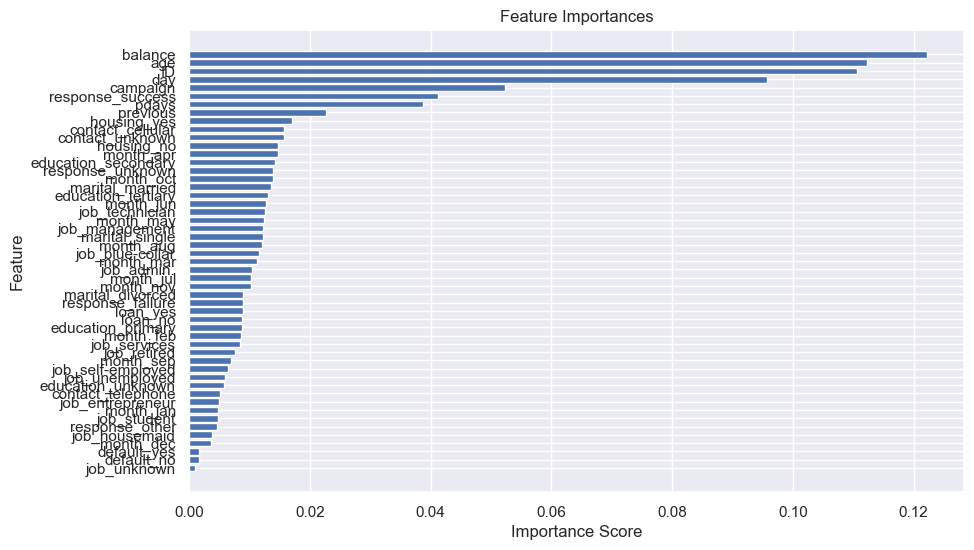

,Feature,Importance
2,balance,0.122248
1,age,0.112327
0,ID,0.110632
3,day,0.095638
4,campaign,0.052297
49,response_success,0.041189
5,pdays,0.038657
6,previous,0.022654
29,housing_yes,0.017085
32,contact_cellular,0.015677


In [31]:
feature_names = X_train.columns
feature_importance_df = plot_feature_importances(rfc,feature_names)
feature_importance_df

In [32]:
X_train.columns

Index(['ID', 'age', 'balance', 'day', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'response_failure', 'response_other', 'response_success',
       'response_unknown'],
      dtype='object')

In [33]:
clfRF_selected = RandomForestClassifier(random_state=42)

clfRF_selected.fit(X_train[['ID', 'age', 'balance', 'day', 'campaign']],y_train)

RandomForestClassifier(random_state=42)

In [35]:
result = evaluate(clfRF_selected,X_train[['ID', 'age', 'balance', 'day', 'campaign']],y_train,
                  X_test[['ID', 'age', 'balance', 'day', 'campaign']],y_test)
result

,Dataset,Gini,Precision,Recall
0,Train,100.000000,1.000000,1.000000
1,Test,29.334044,0.742513,0.891732


# Hyperparameter Tuning Setup 🎯
To improve model performance, I used RandomizedSearchCV with a custom grid of hyperparameters:

🌲 n_estimators: Number of trees in the forest (200 to 1000)

🔍 max_features: How many features to consider at each split (sqrt, 0.3, 0.5, or all)

🏗️ max_depth: Tree depth (10 to 100)

✂️ min_samples_split: Min samples needed to split a node (20 or 50)

🍃 min_samples_leaf: Min samples at each leaf (5, 8, or 10)

This random grid helps explore different model configurations and find the most effective one without trying every possible combo 🔄

In [47]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]

# Create the random grid
random_grid = {'n_estimators': n_estimators, # Number of trees in random forest
               'max_features': ['sqrt', 0.3, 0.5, None], # Number of features to consider at every split
               'max_depth': max_depth, # Maximum number of levels in tree
               'min_samples_split': [20,50], # Minimum number of samples required to split a node
               'min_samples_leaf': [5, 8, 10]} # Minimum number of samples required at each leaf node
print(random_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['sqrt', 0.3, 0.5, None], 'max_depth': [10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100], 'min_samples_split': [20, 50], 'min_samples_leaf': [5, 8, 10]}


In [50]:
rf_random = RandomizedSearchCV(
                    estimator=rfc, 
                    param_distributions=random_grid, 
                    n_iter=50,  
                    cv=3, 
                    verbose=1, 
                    random_state=42, 
                    n_jobs=-1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100],
                                        'max_features': ['sqrt', 0.3, 0.5,
                                                         None],
                                        'min_samples_leaf': [5, 8, 10],
                                        'min_samples_split': [20, 50],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, verbose=1)

In [53]:
rf_random.best_params_

{'n_estimators': 555,
 'min_samples_split': 20,
 'min_samples_leaf': 5,
 'max_features': 0.3,
 'max_depth': 55}

In [54]:
optimized_model = rf_random.best_estimator_
evaluate(optimized_model, X_train, y_train, X_test, y_test)

,Dataset,Gini,Precision,Recall
0,Train,87.650495,0.834678,0.950209
1,Test,56.158937,0.803738,0.924731


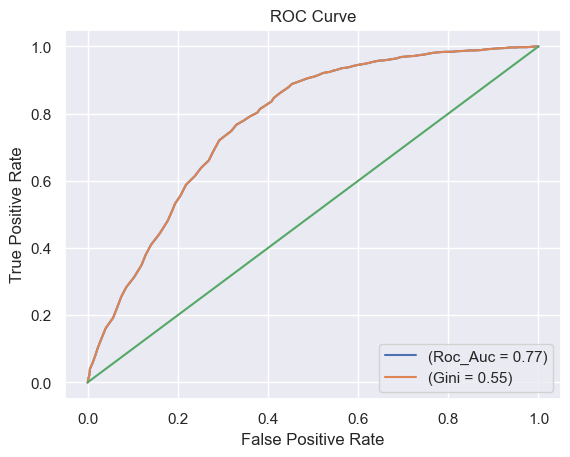

In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = rfc.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

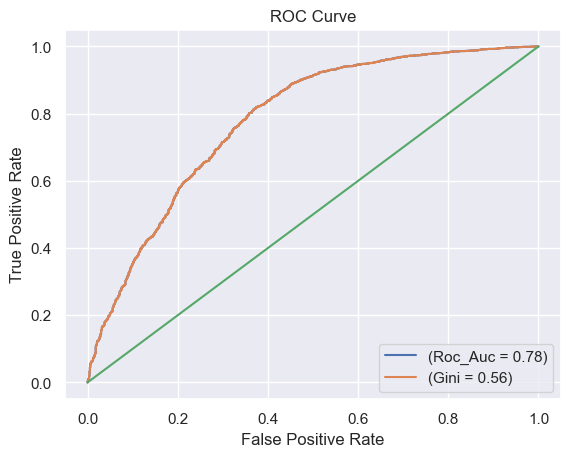

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = optimized_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

# Univariate Analysis 🔍
Univariate analysis looks at each feature individually to see how well it explains the target variable.
It helps identify the most informative and stable predictors to include in the model ✅

In [ ]:
variables = []
train_gini_scores = []
test_gini_scores = []


for i in X_train.columns:
    X_train_single_var = X_train[[i]]
    X_test_single_var = X_test[[i]]

    
    optimized_model.fit(X_train_single_var, y_train)
    
    y_pred_train_single_var = optimized_model.predict_proba(X_train_single_var)[:, 1]

    train_roc = roc_auc_score(y_train, y_pred_train_single_var)
    train_gini = 2 * train_roc - 1

    
    y_pred_test_single_var = optimized_model.predict_proba(X_test_single_var)[:, 1]

    test_roc = roc_auc_score(y_test, y_pred_test_single_var)
    test_gini = 2 * test_roc - 1


    variables.append(i)
    train_gini_scores.append(train_gini)
    test_gini_scores.append(test_gini)


results_df = pd.DataFrame({
                            'Variable': variables,
                            'Train Gini': train_gini_scores,
                            'Test Gini': test_gini_scores
                        })

results_df_sorted = results_df.sort_values(by='Test Gini', ascending=False)
pd.options.display.float_format = '{:.4f}'.format

results_df_sorted

In [ ]:
results_df_sorted.Variable.tolist()

# Final Model 🧠
The final model was built using only the most impactful features, selected based on performance and stability.
This approach ensures a model that is both accurate and efficient, without unnecessary complexity ✅



In [ ]:
inputs = data[['previous',
 'response_unknown',
 'contact_cellular',
 'contact_unknown',
 'housing_yes',
 'housing_no',
 'day',
 'response_success',
 'age',
 'balance',
 'month_may',
 'campaign']]

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(inputs, y, test_size=0.3, random_state=42)

In [ ]:
opt = optimized_model.fit(X_train, y_train)

In [ ]:
result = evaluate(opt, X_train, y_train, X_test, y_test)
result

# Deployment 🚀
Using the final trained model, I calculated the probability of interest for each record in the test_data ✅
Only the features the model was trained on were used — ensuring consistency and reliable predictions 📊🔐

This step prepares the results for real-world use — whether it’s decision-making, reporting, or further action 🧩

In [ ]:
df=pd.read_excel(r'marketing_test.xlsx')
df

In [ ]:
df.describe(include = 'all')

In [ ]:
df=pd.get_dummies(df, dtype=int)
df

In [ ]:
df=df[['ID','previous',
 'response_unknown',
 'contact_cellular',
 'contact_unknown',
 'housing_yes',
 'housing_no',
 'day',
 'response_success',
 'age',
 'balance',
 'month_may',
 'campaign']]

df

In [ ]:
df['pd']=opt.predict_proba(df.iloc[:,1:])[:,1]

df

